In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [39]:
file_path = 'C:/Users/M S I/3.csv'
df = pd.read_csv(file_path)
df.head(600)

,Filename,Contrast,Homogeneity,Energy,Correlation,Label,LL_mean,LL_std,LL_max,LL_min,...,LH_max,LH_min,HL_mean,HL_std,HL_max,HL_min,HH_mean,HH_std,HH_max,HH_min
0,O1.jpg,16.606020,0.465014,0.050401,0.978789,1,223.566415,39.485947,358.529006,79.000,...,67.655036,-81.189882,-0.014234,2.379155,66.136207,-78.591805,0.001719,1.582047,37.243666,-45.375
1,O10.jpg,16.903676,0.473402,0.049770,0.978441,1,214.007791,39.844905,341.217064,59.875,...,49.539655,-58.889727,-0.014011,2.291266,39.090218,-56.508158,-0.010474,1.511130,24.764020,-32.625
2,O100.jpg,15.682164,0.484125,0.052312,0.978381,1,220.424920,38.225242,338.353766,61.250,...,44.908085,-56.941170,-0.006341,2.160105,40.139256,-56.941170,0.000832,1.462215,23.956007,-31.125
3,O101.jpg,16.814039,0.467976,0.049891,0.977905,1,225.253029,39.277396,358.038861,57.750,...,48.527395,-61.054791,-0.007890,2.276626,35.309129,-57.590689,0.006348,1.506491,26.834292,-33.750
4,O102.jpg,19.646427,0.469853,0.051026,0.978078,1,227.732509,42.844963,349.358811,55.125,...,42.855762,-55.209119,-0.012673,2.356774,43.100072,-56.075145,0.000381,1.555144,23.876760,-30.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,N95.jpg,24.556351,0.415696,0.038209,0.986278,0,234.069997,59.823986,392.404887,52.500,...,69.551270,-86.602540,-0.013144,2.532595,68.347023,-86.602540,-0.008253,1.636080,39.472432,-49.500
596,N96.jpg,23.193973,0.434170,0.054296,0.953904,0,221.449216,31.793449,341.701198,73.125,...,47.015136,-60.405272,-0.013994,2.484774,47.015136,-60.405272,-0.001978,1.646318,28.587577,-34.875
597,N97.jpg,21.593509,0.443322,0.053360,0.967217,0,233.265732,36.480808,366.123798,71.875,...,60.044700,-77.942286,-0.012327,2.558306,47.819864,-77.942286,-0.003606,1.616329,32.300798,-42.000
598,N98.jpg,17.676367,0.447908,0.051996,0.966374,0,232.791258,32.558693,341.230848,69.750,...,40.956243,-53.260562,-0.026072,2.284686,43.404800,-55.209119,-0.005919,1.508897,25.059773,-30.750


In [40]:
print(df.info())
print("\nJumlah missing value per kolom:\n", df.isnull().sum())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Filename     600 non-null    object 
 1   Contrast     600 non-null    float64
 2   Homogeneity  600 non-null    float64
 3   Energy       600 non-null    float64
 4   Correlation  600 non-null    float64
 5   Label        600 non-null    int64  
 6   LL_mean      600 non-null    float64
 7   LL_std       600 non-null    float64
 8   LL_max       600 non-null    float64
 9   LL_min       600 non-null    float64
 10  LH_mean      600 non-null    float64
 11  LH_std       600 non-null    float64
 12  LH_max       600 non-null    float64
 13  LH_min       600 non-null    float64
 14  HL_mean      600 non-null    float64
 15  HL_std       600 non-null    float64
 16  HL_max       600 non-null    float64
 17  HL_min       600 non-null    float64
 18  HH_mean      600 non-null    float64
 19  HH_std  

In [41]:
X = df.drop(['Label', 'Filename'], axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Daftar Akurasi untuk Setiap k (ganjil, 3-19):
k	Akurasi (%)
----------------
3	79.44%
5	79.44%
7	80.56%
9	81.11%
11	80.00%
13	82.22%
15	80.00%
17	80.00%
19	81.67%

Nilai k terbaik: 13
Akurasi Tertinggi: 82.22%


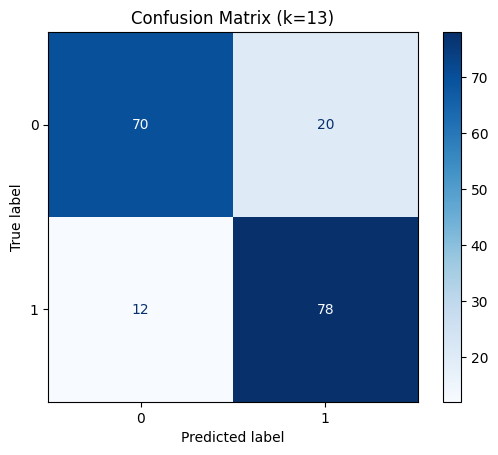


Penjelasan Confusion Matrix:
True Negatives (TN): 70
False Positives (FP): 20
False Negatives (FN): 12
True Positives (TP): 78

Classification Report (dalam persen):
Label             Precision    Recall    F1-Score   Support
------------------------------------------------------------
0                   85.37%     77.78%       81.40%        90
1                   79.59%     86.67%       82.98%        90
------------------------------------------------------------
Accuracy            82.22%
macro avg           82.48%     82.22%       82.19%       180
weighted avg        82.48%     82.22%       82.19%       180


In [51]:
best_k = 1
best_accuracy = 0
best_conf_matrix = None
best_y_pred = None

k_accuracy_dict = {}
accuracies = []

for k in range(3, 21, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    k_accuracy_dict[k] = round(acc * 100, 2)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k
        best_conf_matrix = confusion_matrix(y_test, y_pred)
        best_y_pred = y_pred

print("Daftar Akurasi untuk Setiap k (ganjil, 3-19):")
print("k\tAkurasi (%)")
print("----------------")
for k, acc in k_accuracy_dict.items():
    print(f"{k}\t{acc:.2f}%")

print("\nNilai k terbaik:", best_k)
print("Akurasi Tertinggi:", f"{best_accuracy * 100:.2f}%")

disp = ConfusionMatrixDisplay(confusion_matrix=best_conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (k={best_k})')
plt.show()

tn, fp, fn, tp = best_conf_matrix.ravel()
print("\nPenjelasan Confusion Matrix:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

report = classification_report(y_test, best_y_pred, output_dict=True)

print("\nClassification Report (dalam persen):")
print(f"{'Label':<15}{'Precision':>12}{'Recall':>10}{'F1-Score':>12}{'Support':>10}")
print("-" * 60)

for label, metrics in report.items():
    if label in ['accuracy', 'macro avg', 'weighted avg']:
        continue
    precision = metrics['precision'] * 100
    recall = metrics['recall'] * 100
    f1 = metrics['f1-score'] * 100
    support = metrics['support']
    print(f"{label:<15}{precision:10.2f}%{recall:10.2f}%{f1:12.2f}%{support:10.0f}")

print("-" * 60)
accuracy = report['accuracy'] * 100
print(f"{'Accuracy':<15}{accuracy:10.2f}%")

for avg_type in ['macro avg', 'weighted avg']:
    precision = report[avg_type]['precision'] * 100
    recall = report[avg_type]['recall'] * 100
    f1 = report[avg_type]['f1-score'] * 100
    support = report[avg_type]['support']
    print(f"{avg_type:<15}{precision:10.2f}%{recall:10.2f}%{f1:12.2f}%{support:10.0f}")

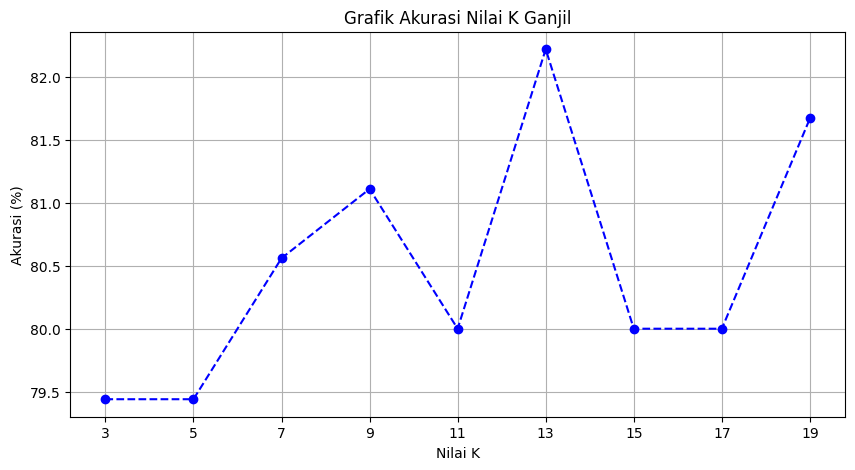

Nilai k terbaik: 13
Akurasi terbaik: 82.22%


In [43]:
best_k = 1
best_accuracy = 0
best_conf_matrix = None
best_y_pred = None

k_accuracy_dict = {}
accuracies = []
k_values = list(range(3, 20, 2))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    k_accuracy_dict[k] = round(acc, 2)

    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k
        best_conf_matrix = confusion_matrix(y_test, y_pred)
        best_y_pred = y_pred

plt.figure(figsize=(10, 5))
plt.plot(k_values, [round(a, 2) for a in accuracies], marker='o', linestyle='--', color='b')
plt.title('Grafik Akurasi Nilai K Ganjil')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi (%)')
plt.xticks(k_values)
plt.grid(True)

plt.savefig('akurasi_vs_k_ganjil.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Nilai k terbaik: {best_k}")
print(f"Akurasi terbaik: {round(best_accuracy, 2)}%")

In [44]:
df = pd.read_csv("C:/Users/M S I/3.csv")
mean_features = df.groupby("Label").mean(numeric_only=True)
mean_features_rounded = mean_features.round(4)
print(mean_features_rounded.transpose())

Label               0         1
Contrast      25.5666   19.7529
Homogeneity    0.4185    0.4582
Energy         0.0470    0.0510
Correlation    0.9696    0.9750
LL_mean      235.9243  225.3537
LL_std        42.0102   40.8227
LL_max       374.8646  360.0870
LL_min        71.7062   62.6185
LH_mean       -0.0199   -0.0158
LH_std         2.8241    2.5491
LH_max        60.7978   53.1062
LH_min       -78.7239  -68.5232
HL_mean       -0.0178   -0.0144
HL_std         2.6695    2.4307
HL_max        57.6648   50.4221
HL_min       -79.0241  -68.3890
HH_mean       -0.0019   -0.0013
HH_std         1.6689    1.5565
HH_max        34.9152   30.0911
HH_min       -44.4388  -38.4975


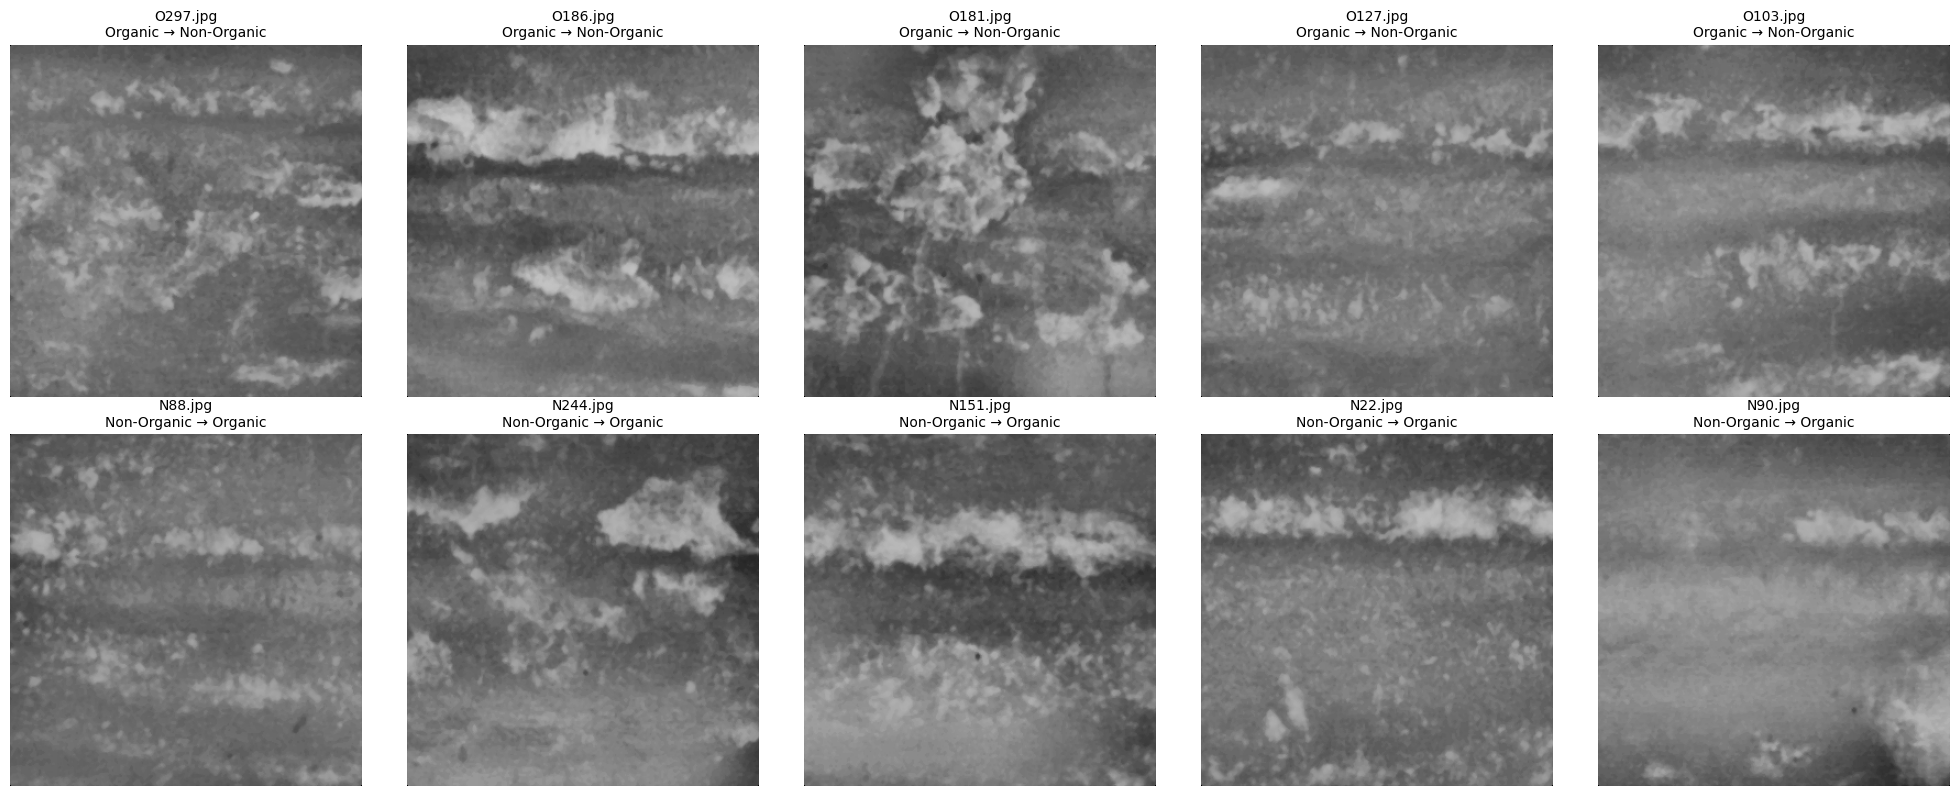

In [45]:
df['Filepath'] = df['Filename'].apply(lambda fname: f"C:/Users/M S I/images/{fname}")

X_test_df = X_test.copy()
X_test_df['True_Label'] = y_test.values
X_test_df['Predicted_Label'] = best_y_pred
X_test_df['Filename'] = df.loc[X_test_df.index, 'Filename'].values
X_test_df['Filepath'] = df.loc[X_test_df.index, 'Filepath'].values

fn_cases = X_test_df[(X_test_df['True_Label'] == 1) & (X_test_df['Predicted_Label'] == 0)]
fp_cases = X_test_df[(X_test_df['True_Label'] == 0) & (X_test_df['Predicted_Label'] == 1)]

num_samples = 5
sampled_fn = fn_cases.sample(n=min(num_samples, len(fn_cases)), random_state=42)
sampled_fp = fp_cases.sample(n=min(num_samples, len(fp_cases)), random_state=42)

cols = 5
rows = 2
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

for i in range(cols):
    ax = axes[0, i]
    if i < len(sampled_fn):
        row = sampled_fn.iloc[i]
        title = f"{row['Filename']}\nOrganic → Non-Organic"
        img_path = row['Filepath']
        if os.path.exists(img_path):
            img = Image.open(img_path).convert('RGB')
            ax.imshow(img)
        else:
            ax.text(0.5, 0.5, 'Image not found', ha='center', va='center')
        ax.set_title(title, fontsize=10)
    ax.axis('off')

for i in range(cols):
    ax = axes[1, i]
    if i < len(sampled_fp):
        row = sampled_fp.iloc[i]
        title = f"{row['Filename']}\nNon-Organic → Organic"
        img_path = row['Filepath']
        if os.path.exists(img_path):
            img = Image.open(img_path).convert('RGB')
            ax.imshow(img)
        else:
            ax.text(0.5, 0.5, 'Image not found', ha='center', va='center')
        ax.set_title(title, fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.savefig('misclassified_samples.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df['Filepath'] = df['Filename'].apply(lambda fname: f"C:/Users/M S I/images/{fname}")

X_test_df = X_test.copy()
X_test_df['True_Label'] = y_test.values
X_test_df['Predicted_Label'] = best_y_pred
X_test_df['Filename'] = df.loc[X_test_df.index, 'Filename'].values
X_test_df['Filepath'] = df.loc[X_test_df.index, 'Filepath'].values

fn_cases = X_test_df[(X_test_df['True_Label'] == 1) & (X_test_df['Predicted_Label'] == 0)]
fp_cases = X_test_df[(X_test_df['True_Label'] == 0) & (X_test_df['Predicted_Label'] == 1)]

print("False Negative Cases (Organik → Non-Organik):")
print(fn_cases[['Filename', 'True_Label', 'Predicted_Label'] + list(X.columns)])
print("\nFalse Positive Cases (Non-Organik → Organik):")
print(fp_cases[['Filename', 'True_Label', 'Predicted_Label'] + list(X.columns)])

False Negative Cases (Organik → Non-Organik):
     Filename  True_Label  Predicted_Label   Contrast  Homogeneity    Energy  \
91   O181.jpg           1                0  34.949466     0.385247  0.036205   
49   O143.jpg           1                0  18.805010     0.463815  0.057171   
134   O22.jpg           1                0  22.511389     0.425651  0.048486   
12    O11.jpg           1                0  20.151393     0.443646  0.057154   
254   O58.jpg           1                0  18.255126     0.456487  0.050078   
5    O103.jpg           1                0  20.121118     0.457934  0.046334   
151  O235.jpg           1                0  25.295916     0.443464  0.044664   
59   O152.jpg           1                0  21.770403     0.444418  0.051707   
31   O127.jpg           1                0  19.436705     0.456282  0.057141   
96   O186.jpg           1                0  27.584822     0.415245  0.044309   
219  O297.jpg           1                0  24.291324     0.422629  0.0487

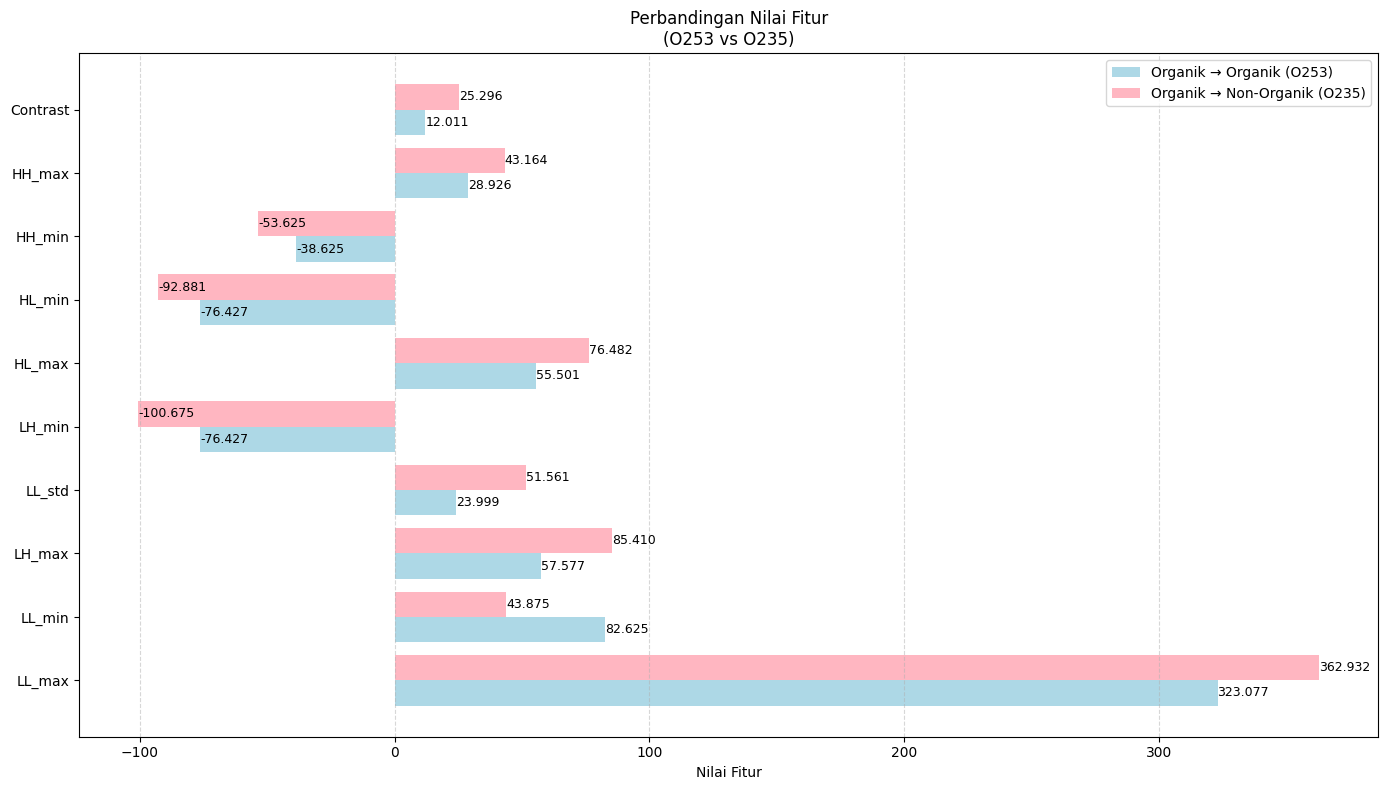

In [47]:
try:
    tp_case = X_test_df[X_test_df['Filename'].str.contains('O253', case=False)].iloc[0]
    fn_case = X_test_df[X_test_df['Filename'].str.contains('O235', case=False)].iloc[0]
except IndexError:
    raise ValueError("Salah satu atau kedua filename ('O253', 'O235') tidak ditemukan di X_test_df['Filename'].")

if not (tp_case['True_Label'] == 1 and tp_case['Predicted_Label'] == 1):
    print("Peringatan: O253 bukan True Positive (Organik → Organik).")
if not (fn_case['True_Label'] == 1 and fn_case['Predicted_Label'] == 0):
    print("Peringatan: O235 bukan False Negative (Organik → Non-Organik).")

fitur_all = X.columns.tolist()
selisih = {feat: abs(tp_case[feat] - fn_case[feat]) for feat in fitur_all}
fitur_terpilih = sorted(selisih, key=selisih.get, reverse=True)[:10]

tp_values = [tp_case[feat] for feat in fitur_terpilih]
fn_values = [fn_case[feat] for feat in fitur_terpilih]

y_pos = np.arange(len(fitur_terpilih))
bar_width = 0.4

plt.figure(figsize=(14, 8))
bars1 = plt.barh(y_pos, tp_values, bar_width, label="Organik → Organik (O253)", color='#ADD8E6')
bars2 = plt.barh(y_pos + bar_width, fn_values, bar_width, label="Organik → Non-Organik (O235)", color='#FFB6C1')

plt.yticks(y_pos + bar_width / 2, fitur_terpilih)
plt.xlabel('Nilai Fitur')
plt.title(f"Perbandingan Nilai Fitur\n(O253 vs O235)")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)

for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    plt.text(bar1.get_width() + 0.01, bar1.get_y() + bar1.get_height() / 2,
             f"{tp_values[i]:.3f}", va='center', fontsize=9, color='black')
    plt.text(bar2.get_width() + 0.01, bar2.get_y() + bar2.get_height() / 2,
             f"{fn_values[i]:.3f}", va='center', fontsize=9, color='black')

plt.tight_layout()
plt.savefig('perbandingan_nilai_fitur_O253_vs_O235.png', dpi=300, bbox_inches='tight')
plt.show()

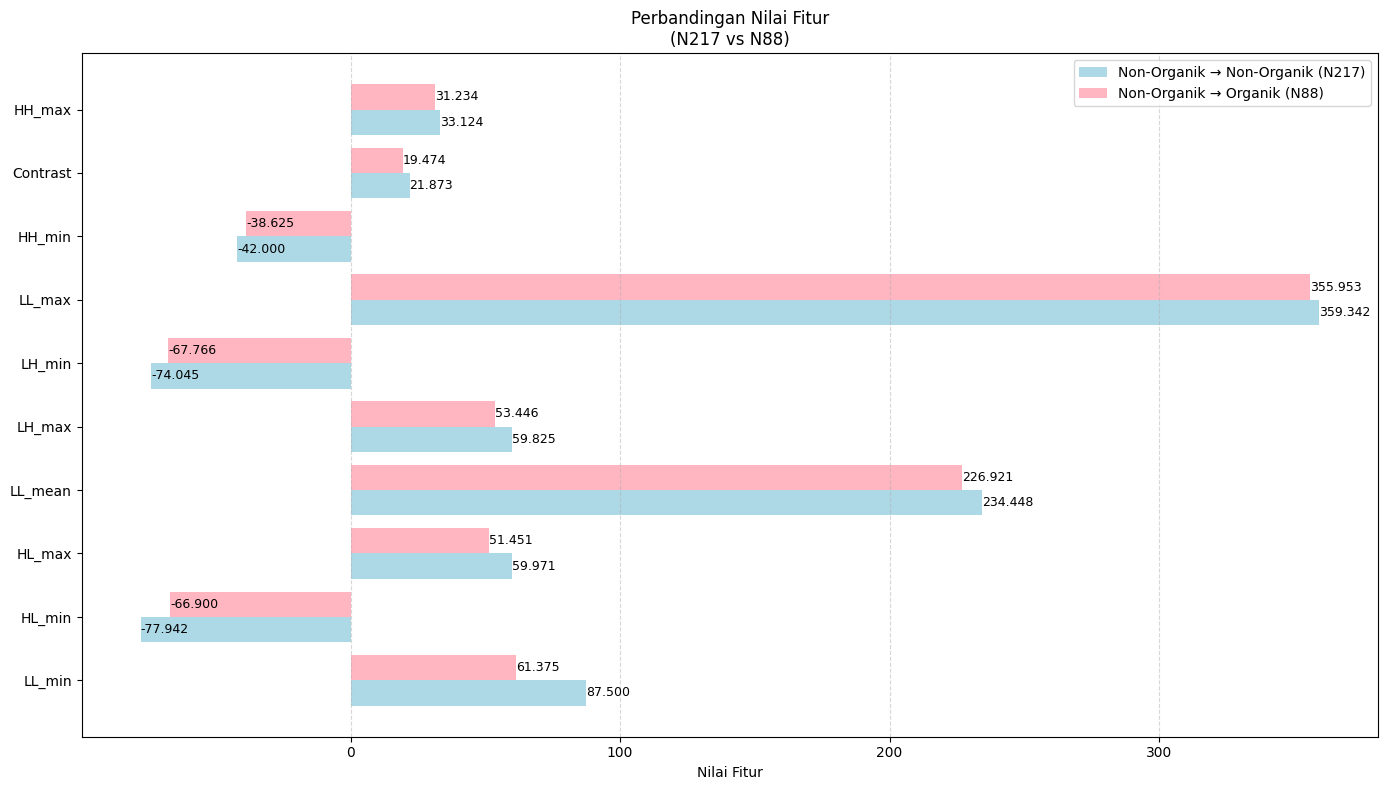

In [48]:
try:
    tn_case = X_test_df[X_test_df['Filename'].str.contains('N217', case=False)].iloc[0]
    fp_case = X_test_df[X_test_df['Filename'].str.contains('N88', case=False)].iloc[0]
except IndexError:
    raise ValueError("Salah satu atau kedua filename ('N217', 'N88') tidak ditemukan di X_test_df['Filename'].")

if not (tn_case['True_Label'] == 0 and tn_case['Predicted_Label'] == 0):
    print("Peringatan: N217 bukan True Negative (Non-Organik → Non-Organik).")
if not (fp_case['True_Label'] == 0 and fp_case['Predicted_Label'] == 1):
    print("Peringatan: N88 bukan False Positive (Non-Organik → Organik).")

fitur_all = X.columns.tolist()
selisih_non = {feat: abs(tn_case[feat] - fp_case[feat]) for feat in fitur_all}
fitur_terpilih_non = sorted(selisih_non, key=selisih_non.get, reverse=True)[:10]

tn_values = [tn_case[feat] for feat in fitur_terpilih_non]
fp_values = [fp_case[feat] for feat in fitur_terpilih_non]

y_pos = np.arange(len(fitur_terpilih_non))
bar_width = 0.4

plt.figure(figsize=(14, 8))
bars1 = plt.barh(y_pos, tn_values, bar_width, label="Non-Organik → Non-Organik (N217)", color='#ADD8E6')
bars2 = plt.barh(y_pos + bar_width, fp_values, bar_width, label="Non-Organik → Organik (N88)", color='#FFB6C1')

plt.yticks(y_pos + bar_width / 2, fitur_terpilih_non)
plt.xlabel('Nilai Fitur')
plt.title(f"Perbandingan Nilai Fitur\n(N217 vs N88)")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)

for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    plt.text(bar1.get_width() + 0.01, bar1.get_y() + bar1.get_height() / 2,
             f"{tn_values[i]:.3f}", va='center', fontsize=9, color='black')
    plt.text(bar2.get_width() + 0.01, bar2.get_y() + bar2.get_height() / 2,
             f"{fp_values[i]:.3f}", va='center', fontsize=9, color='black')

plt.tight_layout()
plt.savefig('perbandingan_nilai_fitur_N217_vs_N88.png', dpi=300, bbox_inches='tight')
plt.show()